In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Définir le chemin vers le dossier principal du dataset
# ---------------------------------------------------
mac_data_dir = "/Users/pcphonemac/Documents/FORMATION DATASCIENTIST/Projet COVID/COVID-19_Radiography_Dataset"
repo_data_dir = "data/COVID-19_Radiography_Dataset"

if os.path.exists(mac_data_dir):
    data_dir = mac_data_dir
else:
    data_dir = repo_data_dir

print("data_dir utilisé :", data_dir)
# Liste pour stocker les informations sur chaque image
data = []

# ---------------------------------------------------
# Parcours des sous-dossiers du dataset : COVID, Normal, Viral Pneumonia, Lung_Opacity
# Chaque sous-dossier contient un dossier "images" avec les fichiers image
# ---------------------------------------------------
for category in os.listdir(data_dir):
    folder_images = os.path.join(data_dir, category, "images")  # chemin complet vers le sous-dossier "images"
    
    # Vérifie que le dossier existe
    if os.path.isdir(folder_images):
        # Parcours de tous les fichiers dans le dossier "images"
        for file in os.listdir(folder_images):
            # On ne garde que les fichiers image PNG ou JPG
            if file.endswith(".png") or file.endswith(".jpg"):
                # On ajoute un dictionnaire avec le chemin complet de l'image et sa catégorie
                data.append({
                    "image_path": os.path.join(folder_images, file),
                    "label": category
                })

# ---------------------------------------------------
# Crée un DataFrame pandas à partir de la liste de dictionnaires
# ---------------------------------------------------
df_images = pd.DataFrame(data)

# Affiche les 5 premières lignes du DataFrame pour vérifier
print(df_images.head())

# Affiche le nombre total d'images détectées
print(f"Nombre total d'images : {len(df_images)}")

# ---------------------------------------------------
# Lecture des fichiers metadata Excel pour chaque catégorie
# ---------------------------------------------------
fichiers_metadata = [
    os.path.join(data_dir, "COVID.metadata.xlsx"),
    os.path.join(data_dir, "Normal.metadata.xlsx"),
    os.path.join(data_dir, "Lung_Opacity.metadata.xlsx"),
    os.path.join(data_dir, "Viral Pneumonia.metadata.xlsx")
]

# Parcours de chaque fichier metadata
for file in fichiers_metadata:
    df_meta = pd.read_excel(file)  # lecture du fichier Excel
    # Affiche le nom du fichier avec une phrase explicative
    print(f"\nLecture du fichier metadata : {file}")
    
    # Affiche le nombre de valeurs manquantes avec une explication
    na_counts = df_meta.isna().sum()
    print("Nombre de valeurs manquantes (NA) par colonne :")
    print(na_counts)
    
    # Séparateur pour la lisibilité
    print("---" * 10)

data_dir utilisé : /Users/pcphonemac/Documents/FORMATION DATASCIENTIST/Projet COVID/COVID-19_Radiography_Dataset
                                          image_path            label
0  /Users/pcphonemac/Documents/FORMATION DATASCIE...  Viral Pneumonia
1  /Users/pcphonemac/Documents/FORMATION DATASCIE...  Viral Pneumonia
2  /Users/pcphonemac/Documents/FORMATION DATASCIE...  Viral Pneumonia
3  /Users/pcphonemac/Documents/FORMATION DATASCIE...  Viral Pneumonia
4  /Users/pcphonemac/Documents/FORMATION DATASCIE...  Viral Pneumonia
Nombre total d'images : 21165

Lecture du fichier metadata : /Users/pcphonemac/Documents/FORMATION DATASCIENTIST/Projet COVID/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
Nombre de valeurs manquantes (NA) par colonne :
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64
------------------------------

Lecture du fichier metadata : /Users/pcphonemac/Documents/FORMATION DATASCIENTIST/Projet COVID/COVID-19_Radiography_Dataset/Normal.metadata

In [4]:
  import numpy as np
  from PIL import Image
  import pandas as pd
  import cv2

  def extract_image_features(image_path):
      img = Image.open(image_path).convert('L')
      arr = np.array(img, dtype=np.float32)

      mean_int = arr.mean()
      std_int = arr.std()
      contrast = std_int / (mean_int + 1e-8)
      entropy = -np.sum((arr/255)**2 * np.log((arr/255)**2 + 1e-8))

      # Gradient avec cv2 au lieu de scipy
      gradient = cv2.Sobel(arr.astype(np.uint8), cv2.CV_64F, 1, 0).std()

      return {
          'mean_intensity': mean_int,
          'std_intensity': std_int,
          'contrast': contrast,
          'entropy': entropy,
          'gradient': gradient
      }

  df_sample = df_images.groupby('label', group_keys=False).head(100).reset_index(drop=True)

  features_list = []
  for i, row in df_sample.iterrows():
      if i % 50 == 0:
          print(f"{i}/{len(df_sample)}")
      features = extract_image_features(row['image_path'])
      features['label'] = row['label']
      features_list.append(features)

  df_features = pd.DataFrame(features_list)
  print(df_features.head())

0/400
50/400
100/400
150/400
200/400
250/400
300/400
350/400
   mean_intensity  std_intensity  contrast       entropy   gradient  \
0      139.356400      43.010323  0.308635  28245.414062  37.364135   
1      121.609413      67.229980  0.552835  23168.529297  55.809584   
2       92.916008      53.904861  0.580146  21401.175781  44.940735   
3      130.471130      54.564732  0.418213  26457.185547  38.314032   
4      131.081360      53.919338  0.411343  26166.500000  32.942705   

             label  
0  Viral Pneumonia  
1  Viral Pneumonia  
2  Viral Pneumonia  
3  Viral Pneumonia  
4  Viral Pneumonia  


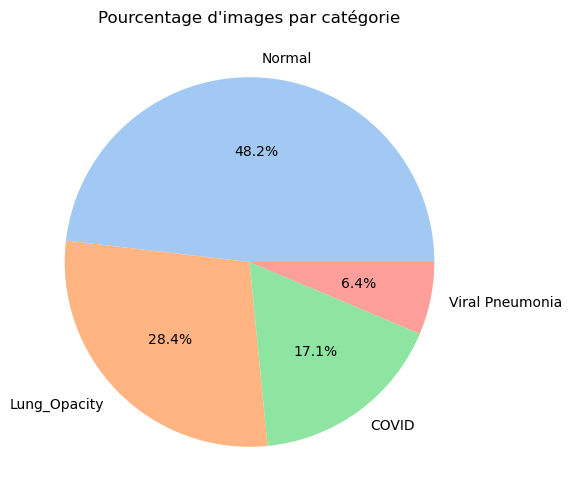

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 2 : Pourcentage d'images par catégorie
# ---------------------------------------------------
plt.figure(figsize=(6,6))
df_images['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Pourcentage d'images par catégorie")
plt.ylabel("")  # enlève le label y
plt.savefig(os.path.join(data_dir, "Pourcentage d'images par catégorie"), dpi=300)
plt.show()

# Commentaire métier :
# Le pourcentage montre visuellement le déséquilibre.
# Le graphique montre visuellement le déséquilibre entre les différentes catégories d'images.
# Cela permet d'identifier les classes majoritaires et minoritaires, ce qui est important
# pour comprendre la distribution des données avant d'appliquer un modèle de classification.


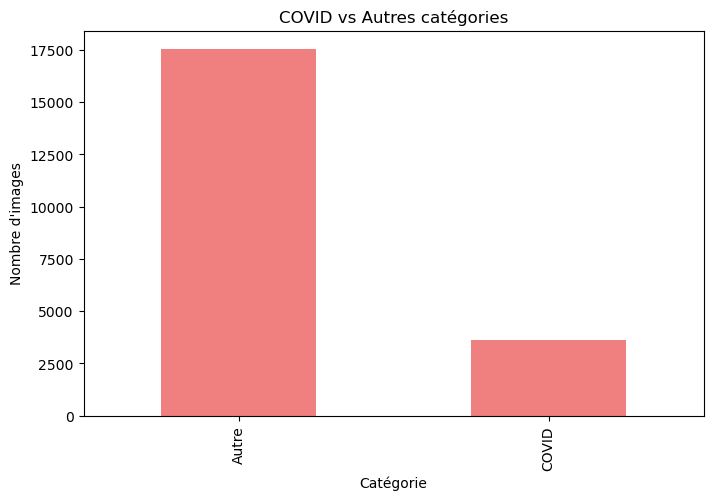

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
# ---------------------------------------------------
# Graphique 3 : Nombre d'images COVID vs les autres catégories
# ---------------------------------------------------
# Objectif : mettre en avant le déséquilibre de COVID
plt.figure(figsize=(8,5))
covid_counts = df_images['label'].apply(lambda x: 'COVID' if x=='COVID' else 'Autre')
covid_counts.value_counts().plot(kind='bar', color='lightcoral')
plt.title("COVID vs Autres catégories")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(data_dir, "COVID vs Autres catégories"), dpi=300)
plt.show()

# La catégorie COVID est minoritaire par rapport aux autres. 
# Sans correction, le modèle pourrait sous-predict les cas COVID, 
# ce qui risque d’affecter la détection des patients à risque.


Nombre d'images en double : 0


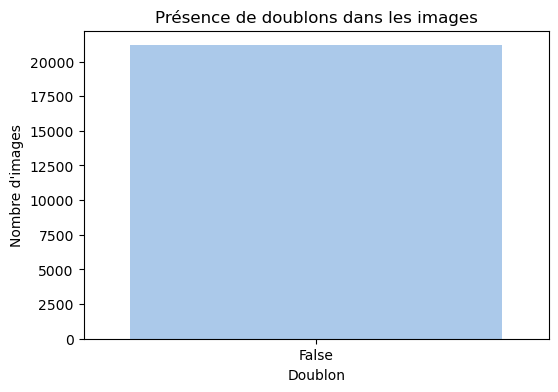

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 4 : Vérification de présence de doublons (images identiques)
# ---------------------------------------------------
# Objectif : vérifier si des fichiers sont identiques
duplicate_counts = df_images['image_path'].duplicated().sum()
print(f"Nombre d'images en double : {duplicate_counts}")

# Graphique simple pour visualiser présence/absence de doublons
plt.figure(figsize=(6,4))
sns.countplot(x=df_images['image_path'].duplicated(),
              hue=df_images['image_path'].duplicated(),  
              palette='pastel',
              legend=False)
plt.title("Présence de doublons dans les images")
plt.xlabel("Doublon")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(data_dir, "Présence de doublons dans les images"), dpi=300)
plt.show()

# Vérifier la présence de doublons permet de s'assurer que le modèle ne sera pas influencé.
# Si des images identiques apparaissent plusieurs fois, le modèle pourrait "mémoriser" ces exemples
# au lieu d'apprendre de vraies caractéristiques, ce qui réduirait ses performances sur de nouvelles images.
# Ici, la totalité des images sont uniques, ce qui garantit la fiabilité du dataset pour l'entraînement du modèle.



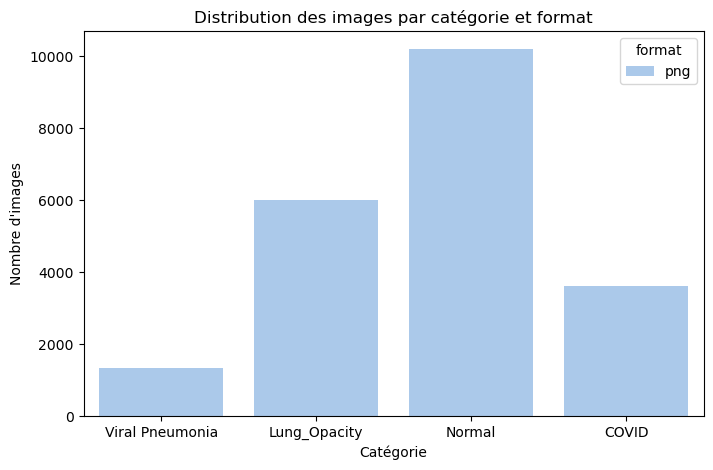

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 5 : Distribution des images par catégorie et sous-catégorie de format (si PNG/JPG)
# ---------------------------------------------------
# Comme toutes les images sont PNG, on montre quand même un graphique pour vérifier
df_images['format'] = df_images['image_path'].apply(lambda x: x.split('.')[-1])
plt.figure(figsize=(8,5))
sns.countplot(x='label', hue='format', data=df_images, palette='pastel')
plt.title("Distribution des images par catégorie et format")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(data_dir, "Distribution des images par catégorie et format"), dpi=300)
plt.show()

# Commentaire métier :
# Toutes les images sont au format PNG, donc pas de variabilité de format dans le dataset actuel.
#Cette vérification est importante pour anticiper d’éventuels problèmes si d’autres formats (comme JPG) s’ajoutent à l’avenir.,
# car des formats différents peuvent nécessiter un prétraitement spécifique avant l'entraînement du modèle.


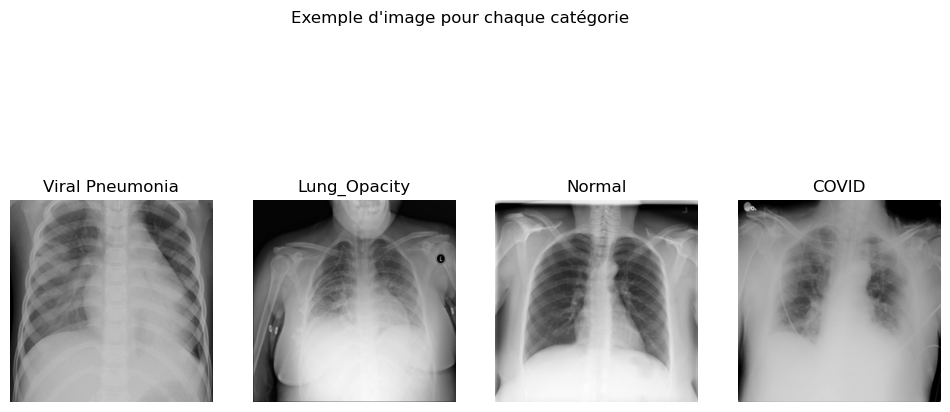

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sélectionne un exemple d'image pour chaque catégorie
categories = df_images['label'].unique()
exemples = []

for cat in categories:
    exemple_image = df_images[df_images['label'] == cat].iloc[0]['image_path']
    exemples.append((cat, exemple_image))

# Affichage
plt.figure(figsize=(12,6))

for i, (label, img_path) in enumerate(exemples):
    img = mpimg.imread(img_path)
    plt.subplot(1, len(exemples), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.suptitle("Exemple d'image pour chaque catégorie")
plt.savefig(os.path.join(data_dir, "Exemple d'image pour chaque catégorie"), dpi=300)
plt.show()



#La visualisation des images représentatives pour chaque catégorie permet de mieux comprendre les différences visuelles entre les cas.
#On remarque que :

#COVID-19 : les radiographies montrent souvent des opacités diffuses, parfois bilatérales, ce qui correspond aux infiltrats pulmonaires typiques du COVID.

#Normal : les images montrent des poumons clairs sans anomalies visibles, ce qui constitue la référence pour la détection des pathologies.

#Lung Opacity (Non-COVID) : ces radiographies présentent des zones d’opacité, indiquant des infections pulmonaires ou inflammations différentes du COVID-19.

#Viral Pneumonia : les images montrent des opacités plus localisées ou des motifs particuliers liés à la pneumonie virale.

#Cette étape est importante pour :

#vérifier la qualité et la représentativité des images dans chaque classe,

#anticiper les difficultés que le modèle pourrait rencontrer pour différencier des classes visuellement similaires,

#sensibiliser à la nécessité de prétraitement (normalisation, redimensionnement, augmentation) pour améliorer la performance du modèle de classification.

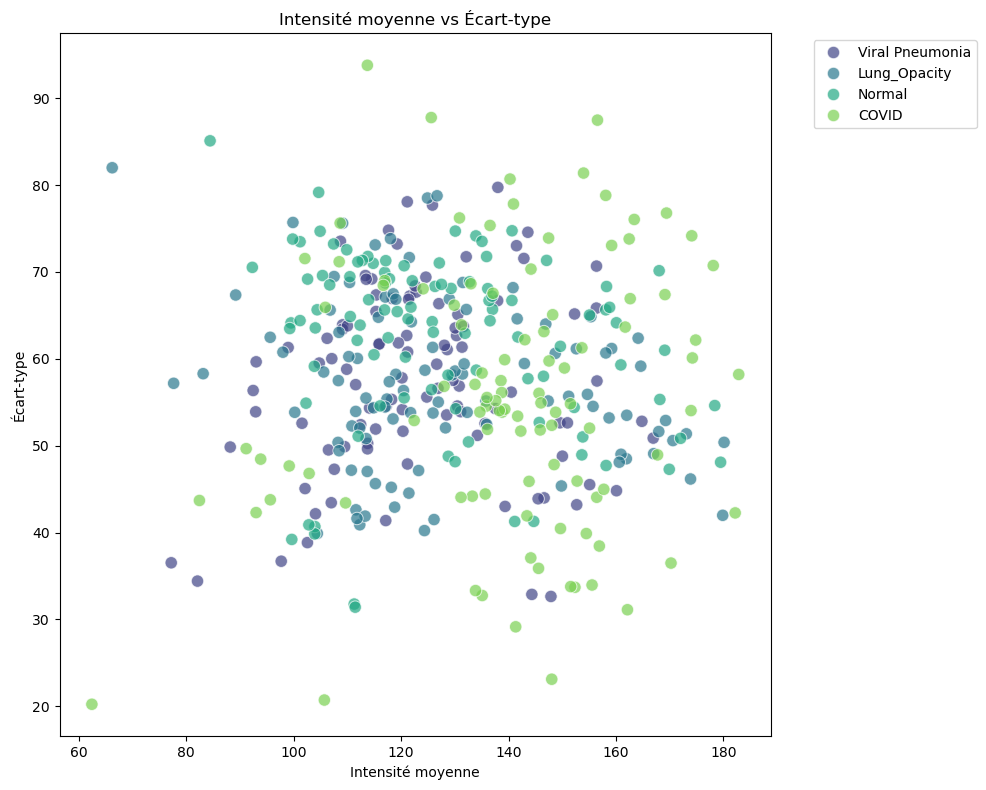

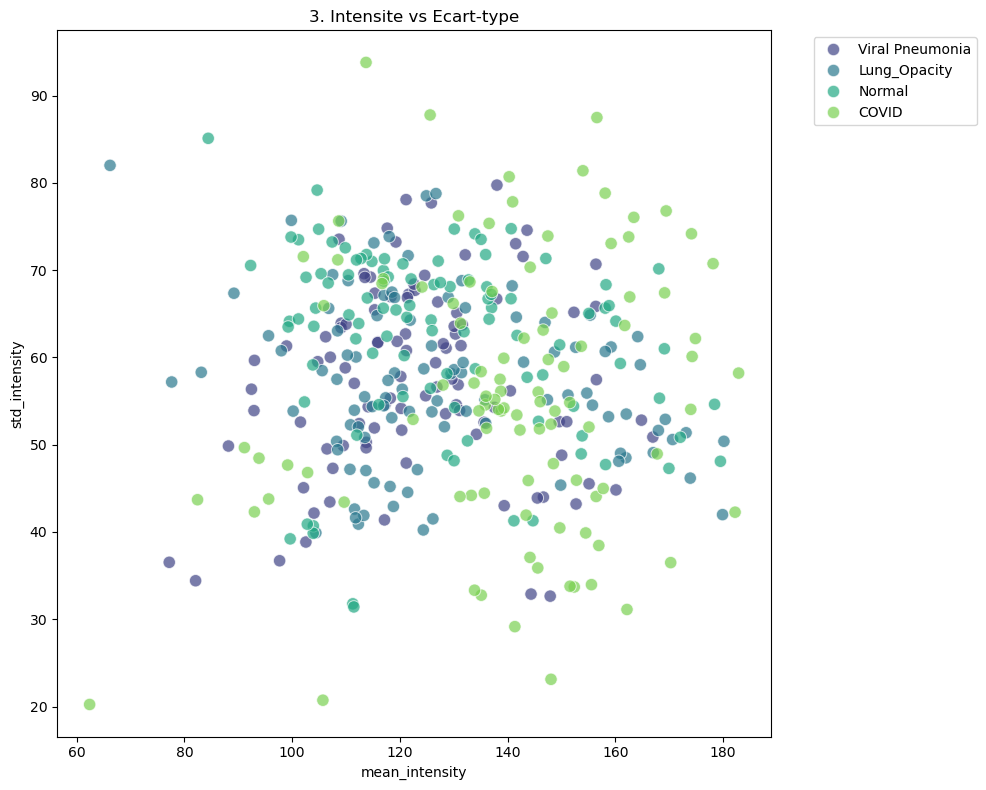

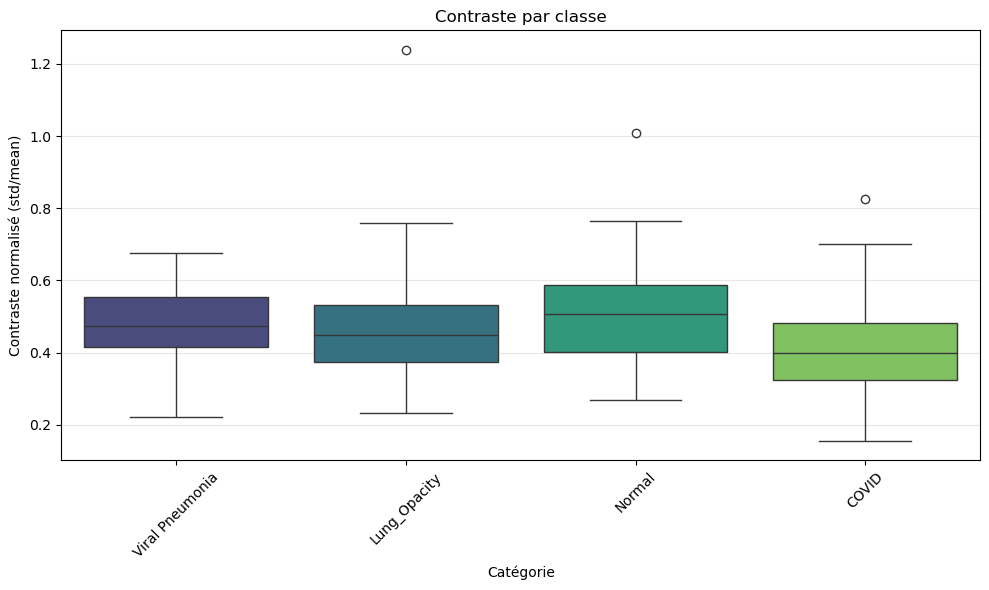

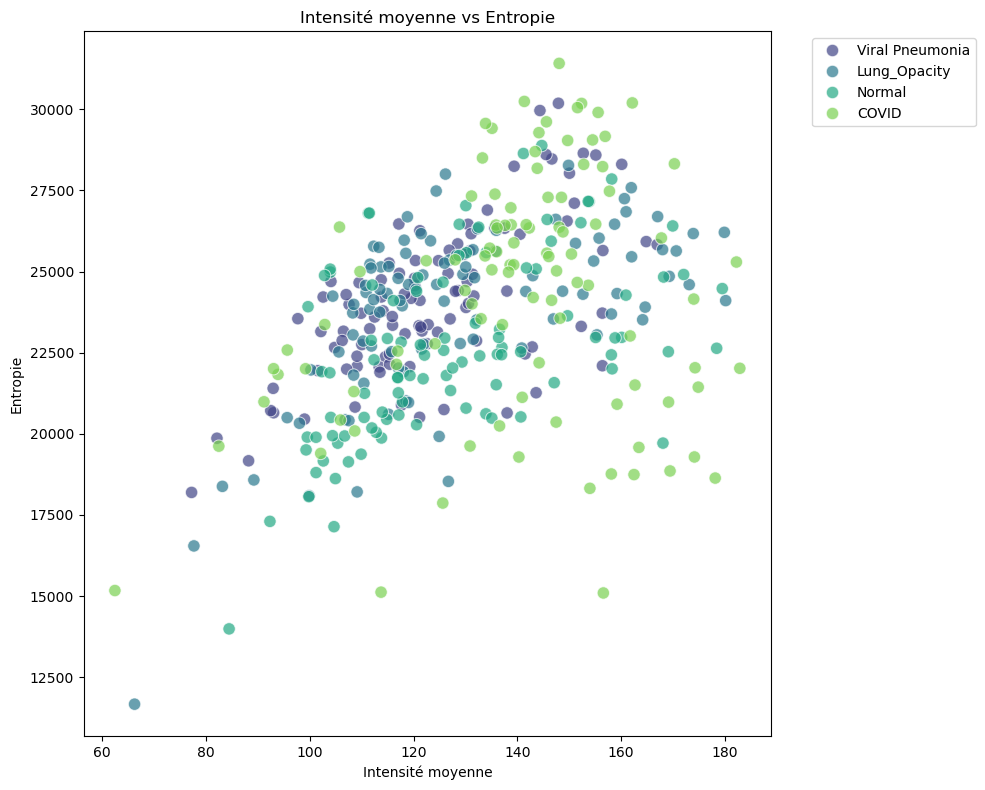

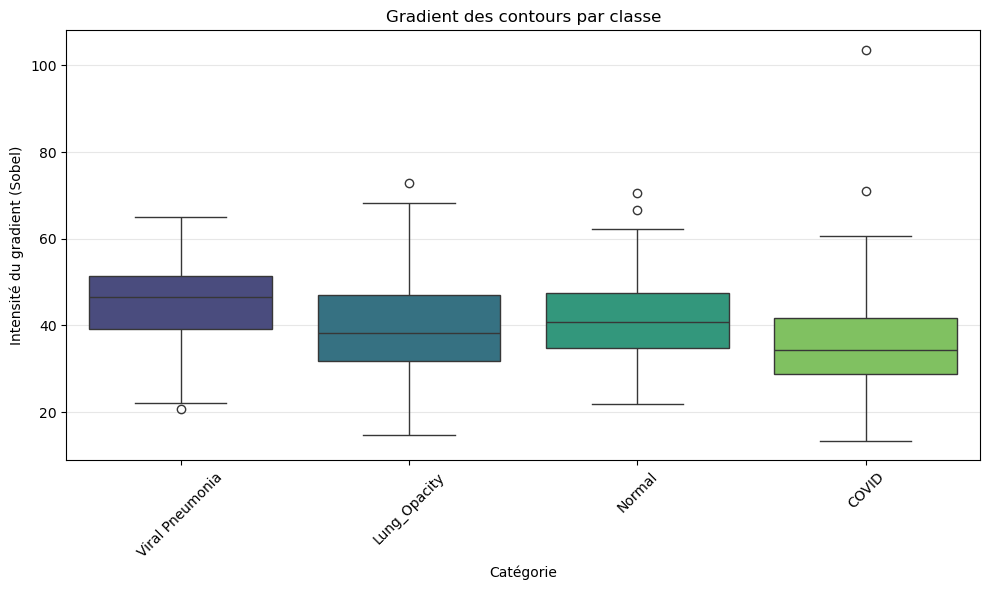

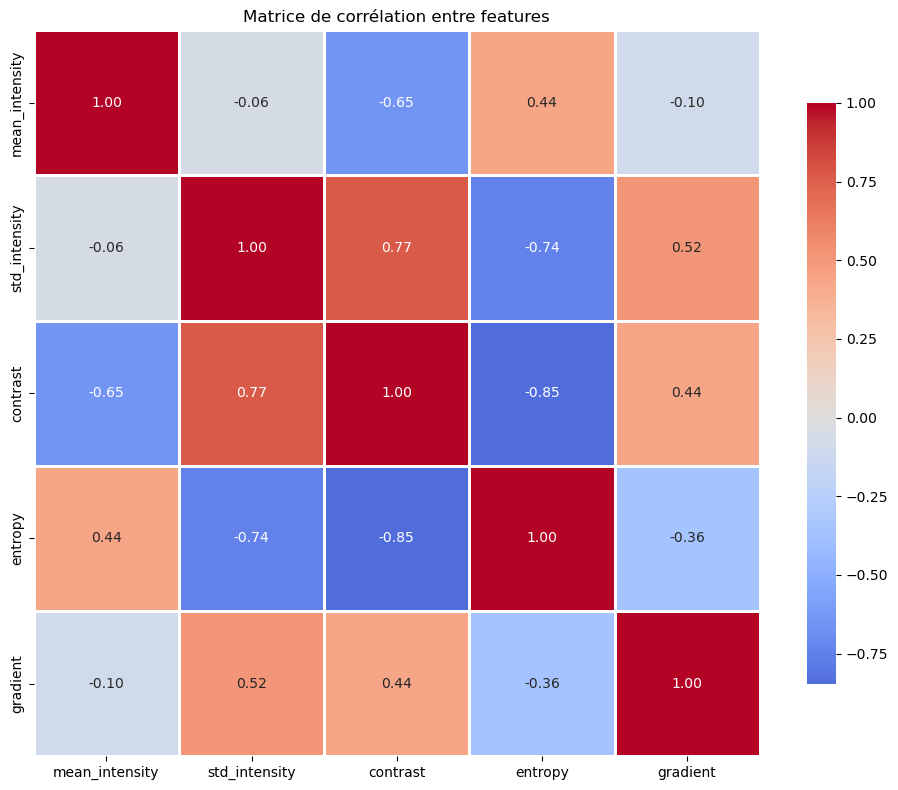

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 7 : Intensité moyenne vs Écart-type (scatter)
# ---------------------------------------------------
# Objectif : vérifier la qualité technique des radiographies
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_features, 
    x='mean_intensity', 
    y='std_intensity',
    hue='label', 
    s=80, 
    alpha=0.7, 
    palette='viridis'
)
plt.title("Intensité moyenne vs Écart-type")
plt.xlabel("Intensité moyenne")
plt.ylabel("Écart-type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Commentaire métier :
# Ce graphique vérifie la qualité technique des radiographies. En imagerie médicale, une corrélation linéaire
# est attendue entre l'intensité moyenne et l'écart-type.
# Les points qui s'écartent fortement de la diagonale principale peuvent signaler des images surexposées (trop blanches) 
# ou sous-exposées (trop noires), ou la présence d'artefacts (sondes, texte incrusté) qui pourraient perturber l'apprentissage.


import matplotlib.pyplot as plt
import seaborn as sns
import os

# ---------------------------------------------------
# Graphique 8 : Intensité moyenne vs Écart-type (Vérification exposition)
# ---------------------------------------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_features, 
    x='mean_intensity', 
    y='std_intensity',
    hue='label', 
    s=80, 
    alpha=0.7, 
    palette='viridis'
)
plt.title("3. Intensite vs Ecart-type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, "Graphique_3_Intensite_vs_Std.png"), dpi=300)
plt.show()

# Commentaire métier :
# Ce graphique vérifie la qualité radiométrique des images. En imagerie médicale, on attend une corrélation linéaire
# entre l'intensité moyenne et l'écart-type. Les points s'écartant fortement de la diagonale peuvent indiquer
# des images mal exposées (trop sombres/claires) ou des artefacts (implants, texte) qui perturberaient le modèle.

# ---------------------------------------------------
# Graphique 9 : Contraste par classe (boxplot)
# ---------------------------------------------------
# Objectif : comparer la variabilité des intensités entre catégories
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='label', 
    y='contrast',
    data=df_features,
    hue='label',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title("Contraste par classe")
plt.xlabel("Catégorie")
plt.ylabel("Contraste normalisé (std/mean)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Commentaire métier :
# Le contraste permet d'évaluer la variabilité des intensités dans chaque catégorie.
# Des différences significatives peuvent indiquer des patterns visuels distincts entre les classes,
# ce qui est utile pour la classification automatique.

# ---------------------------------------------------
# Graphique 10 : Intensité vs Entropie (scatter)
# ---------------------------------------------------
# Objectif : analyser la relation entre intensité et complexité de texture
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_features, 
    x='mean_intensity', 
    y='entropy',
    hue='label', 
    s=80, 
    alpha=0.7, 
    palette='viridis'
)
plt.title("Intensité moyenne vs Entropie")
plt.xlabel("Intensité moyenne")
plt.ylabel("Entropie")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Commentaire métier :
# L'entropie mesure la complexité/désordre de la texture de l'image.
# Une entropie élevée indique une texture complexe (potentiellement des opacités ou anomalies),
# tandis qu'une entropie faible suggère une texture homogène (poumons clairs).

# ---------------------------------------------------
# Graphique 11 : Gradient des contours par classe (boxplot)
# ---------------------------------------------------
# Objectif : comparer l'intensité des contours entre catégories
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='label', 
    y='gradient',
    data=df_features,
    hue='label',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title("Gradient des contours par classe")
plt.xlabel("Catégorie")
plt.ylabel("Intensité du gradient (Sobel)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Commentaire métier :
# Le gradient capture l'intensité des contours dans l'image.
# Des gradients élevés peuvent indiquer la présence de structures marquées (opacités, lésions pulmonaires),
# tandis que des gradients faibles suggèrent des transitions douces (poumons normaux).

# ---------------------------------------------------
# Graphique 12 : Matrice de corrélation des 5 features (heatmap)
# ---------------------------------------------------
# Objectif : identifier les relations linéaires entre features
plt.figure(figsize=(10, 8))
corr_matrix = df_features[['mean_intensity', 'std_intensity', 'contrast', 'entropy', 'gradient']].corr()
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    cbar_kws={'shrink': 0.8}, 
    fmt='.2f', 
    square=True,
    linewidths=1,
    linecolor='white'
)
plt.title("Matrice de corrélation entre features")
plt.tight_layout()
plt.show()

# Commentaire métier :
# La matrice de corrélation révèle les relations linéaires entre les différentes features.
# - Corrélations fortes (proches de 1 ou -1) : redondance possible entre features
# - Corrélations faibles (proches de 0) : features complémentaires apportant des informations distinctes
# Cette analyse aide à sélectionner les features les plus pertinentes pour le modèle de classification.

In [11]:
# ============================================
# ÉTAPE 2 – PRE-PROCESSING & FEATURE ENGINEERING
# Objectif : Préparer un dataset propre, enrichi
# et prêt pour le Machine / Deep Learning
# ============================================

# Imports
import os
import pandas as pd
from PIL import Image

# --------------------------------------------
# 1. Nettoyage des données simplifié
# --------------------------------------------

print("=== NETTOYAGE DU DATASET ===")

# Vérification des doublons
duplicates = df_images.duplicated(subset='image_path').sum()
print(f"Nombre de doublons : {duplicates}")
df_images = df_images.drop_duplicates(subset='image_path')

# ------------------------------
# NOTE : Pas besoin de dropna() car il n'y a pas de valeurs manquantes
# df_images = df_images.dropna()
# ------------------------------

# Vérification de l'existence des fichiers
missing_files = [p for p in df_images['image_path'] if not os.path.exists(p)]
print(f"Fichiers manquants : {len(missing_files)}")
df_images = df_images[~df_images['image_path'].isin(missing_files)]

# Détection des images corrompues
corrupted_images = []
for p in df_images['image_path']:
    try:
        img = Image.open(p)
        img.verify()
    except:
        corrupted_images.append(p)

print(f"Images corrompues : {len(corrupted_images)}")
df_images = df_images[~df_images['image_path'].isin(corrupted_images)]

# ------------------------------
# NOTE : Toutes les images sont PNG et de taille correcte
# => Pas besoin de vérifier les formats ni les dimensions
# ------------------------------

print(f"\nNombre final d'images : {len(df_images)}")

# Commentaire :
# Le dataset est maintenant complet, cohérent et prêt pour la phase de normalisation et d'augmentation des données.
# Après ce nettoyage, nous conservons 21 165 images valides pour le pré-processing.


=== NETTOYAGE DU DATASET ===
Nombre de doublons : 0
Fichiers manquants : 0
Images corrompues : 0

Nombre final d'images : 21165



=== PRE-PROCESSING ===


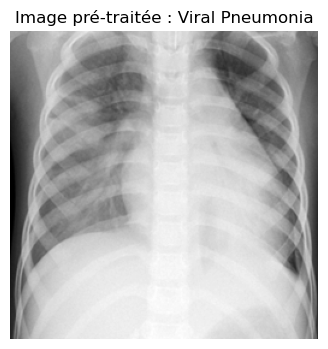

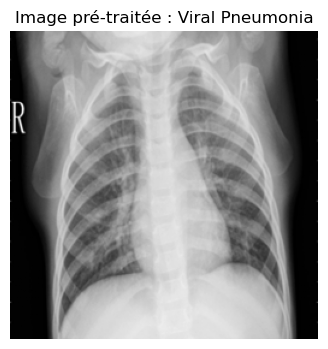

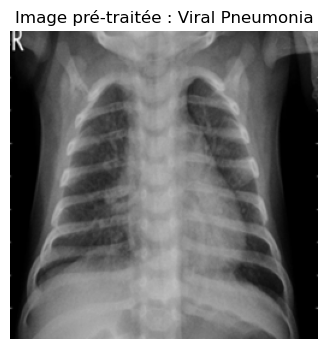

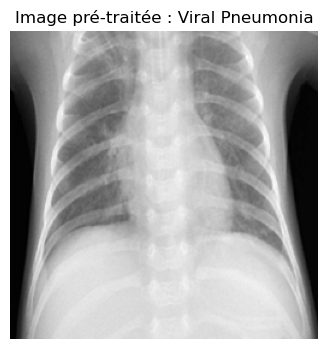

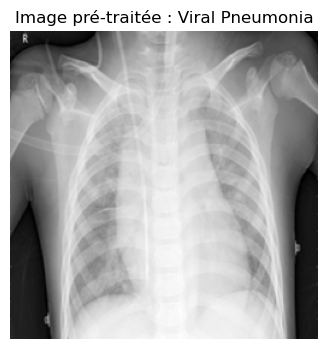

Shape de X (nombre d'images, hauteur, largeur) pour test : (100, 256, 256)


In [12]:
# =============================================
# 2. Pré-processing – Normalisation des images
# =============================================

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("\n=== PRE-PROCESSING ===")

# --- Taille cible pour le modèle ---
# Même si les images sont déjà toutes de taille identique (299x299),
# on peut les redimensionner à 256x256 pour standardiser l'entrée du modèle
TARGET_SIZE = (256, 256)

def preprocess_image(path):
    """
    Charge une image depuis le chemin `path`, la convertit en niveaux de gris,
    la redimensionne à TARGET_SIZE, et normalise les pixels entre 0 et 1.
    """
    img = Image.open(path).convert('L')       # Conversion en niveaux de gris
    img = img.resize(TARGET_SIZE)             # Redimensionnement (optionnel ici)
    img_array = np.array(img, dtype=np.float32) / 255.0  # Normalisation
    return img_array

# --- Traitement des images par lot pour éviter MemoryError ---
# On utilise une liste et on ne convertit en np.array que pour le batch si nécessaire
X_list = []
num_to_show = 5  # nombre d'images à visualiser

for i, path in enumerate(df_images['image_path']):
    img_array = preprocess_image(path)
    
    # Ajouter à la liste
    X_list.append(img_array)
    
    # Affichage pour vérification (seulement pour les premières images)
    if i < num_to_show:
        plt.figure(figsize=(4,4))
        plt.imshow(img_array, cmap='gray')
        plt.title(f"Image pré-traitée : {df_images['label'].iloc[i]}")
        plt.axis('off')
        plt.show()

# --- Optionnel : conversion en np.array 
# Ici, pour l'exemple, on ne convertit que les 100 premières images pour tester
X = np.array(X_list[:100], dtype=np.float32)
print("Shape de X (nombre d'images, hauteur, largeur) pour test :", X.shape)

# Commentaires explicatifs :
# 1. Toutes les images sont maintenant homogènes : même taille, niveaux de gris, pixels normalisés.
# 2. La normalisation entre 0 et 1 permet aux modèles de deep learning de converger plus rapidement.
# 3. Le tableau X_list contient toutes les images prêtes pour le Machine Learning ou Deep Learning.
# 4. La visualisation des premières images permet de vérifier que le prétraitement fonctionne correctement.
# 5. Avec ce procédé, on évite les problèmes de mémoire et on peut traiter le dataset complet par batch.


In [13]:
# =============================================
# ÉTAPE 3 – GAUSSIAN BLUR : Réduction du bruit (batch test)
# =============================================

import cv2
import numpy as np

# --- Ici, on utilise le batch X préparé précédemment ---
# Pour éviter les problèmes de mémoire, X contient par exemple les 100 premières images
print("Shape de X pour le test :", X.shape)  # (100, 256, 256)

# Application du filtre Gaussian Blur sur chaque image
# Gaussian Blur : lissage de l'image pour réduire le bruit tout en conservant les contours importants
# Paramètres :
# - (3,3) : taille du noyau
# - 0 : écart type calculé automatiquement
blur_images = np.array([cv2.GaussianBlur(img, (3,3), 0) for img in X], dtype=np.float32)

print("Shape de blur_images :", blur_images.shape)  # Devrait être (100, 256, 256)

# --- Commentaires  ---
# 1. Chaque image a été normalisée puis lissée avec un filtre Gaussian Blur.
# 2. Objectifs :
#    - Réduire le bruit présent sur les radiographies
#    - Préserver les structures importantes pour la classification (opacités, anomalies)
#    - Préparer les images pour l'entraînement des modèles de Machine/Deep Learning
# 3. Détails :
#    - Nombre d'images traitées dans ce batch : 100 (pour test)
#    - Taille des images : 256x256 pixels
#    - Chaque image est conservée en niveau de gris (1 canal)
# 4. Pour le dataset complet (21 165 images), il faudra appliquer le traitement par batch pour éviter MemoryError.


Shape de X pour le test : (100, 256, 256)
Shape de blur_images : (100, 256, 256)


In [14]:
# --------------------------------------------
# 4. Canny – Détection de contours
# --------------------------------------------

print("\n=== CANNY EDGE DETECTION ===")

# L'algorithme Canny est utilisé pour détecter les contours dans les images.
# Avant l'application, il faut convertir les images normalisées (0-1) en uint8 (0-255)
# car OpenCV Canny fonctionne avec des entiers 8 bits.
canny_images = []

for i, img in enumerate(blur_images):
    # Conversion en uint8
    img_uint8 = (img * 255).astype(np.uint8)
    
    # Application de Canny
    edges = cv2.Canny(img_uint8, 100, 200)
    
    # Stockage en uint8 pour économiser de la mémoire
    canny_images.append(edges.astype(np.uint8))

# Conversion en array numpy
canny_images = np.array(canny_images, dtype=np.uint8)
print("Canny applied, shape:", canny_images.shape)  # Vérification de la forme

# --------------------------------------------
# 5. Sobel – Feature Engineering (bords verticaux)
# --------------------------------------------

print("\n=== SOBEL FILTER ===")

# Sobel est utilisé pour détecter les gradients verticaux (bords verticaux) dans les images.
# Cette étape enrichit les features extraites des images pour le modèle.
sobel_images = []

for img in blur_images:
    # Application du filtre Sobel sur l'axe X (1,0)
    sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0)  # Résultat en float64
    sobel_images.append(sobel.astype(np.float32))  # Conversion en float32 pour réduire la mémoire

# Conversion en array numpy
sobel_images = np.array(sobel_images, dtype=np.float32)
print("Sobel applied, shape:", sobel_images.shape)  # Vérification de la forme

# --------------------------------------------
# Commentaires explicatifs pour le rapport :
# --------------------------------------------
# 1. Canny : met en évidence les contours et limites dans les radiographies.
#    Cela permet au modèle d'identifier des structures importantes comme les opacités pulmonaires.
# 2. Sobel : extrait les gradients verticaux des images.
#    Cela enrichit les features et aide le modèle à mieux détecter les anomalies.
# 3. Ces étapes constituent le Feature Engineering, c'est-à-dire la création
#    de nouvelles informations à partir des images brutes pour améliorer les performances du modèle.
# 4. Les images restent toutes à la même taille : 256x256 pixels, et en niveau de gris.
# 5. Ce traitement est appliqué sur un batch d'images pour éviter les problèmes de mémoire.



=== CANNY EDGE DETECTION ===
Canny applied, shape: (100, 256, 256)

=== SOBEL FILTER ===
Sobel applied, shape: (100, 256, 256)


In [15]:
# --------------------------------------------
# 6. Laplacian – Feature Engineering
# --------------------------------------------

print("\n=== LAPLACIAN FILTER ===")

laplacian_images = []

# Le filtre Laplacien met en évidence les zones où l'intensité des pixels change rapidement
# Il est utilisé pour détecter les contours et détails fins
for img in blur_images:
    # Conversion en uint8 pour compatibilité OpenCV (0-255)
    img_uint8 = (img * 255).astype(np.uint8)
    lap = cv2.Laplacian(img_uint8, cv2.CV_64F)  # applique le filtre Laplacien
    laplacian_images.append(lap.astype(np.float32))  # conversion en float32 pour ML

laplacian_images = np.array(laplacian_images, dtype=np.float32)
print("Laplacian applied, shape:", laplacian_images.shape)

# --------------------------------------------
# 7. Morphologie – Érosion
# --------------------------------------------

print("\n=== EROSION ===")

# Définition du noyau pour l'érosion
kernel = np.ones((5,5), np.uint8)
erosion_images = []

# L'érosion réduit les zones claires, accentuant certaines structures et supprimant le bruit
for img in blur_images:
    img_uint8 = (img * 255).astype(np.uint8)  # Conversion en uint8 pour OpenCV
    ero = cv2.erode(img_uint8, kernel)
    erosion_images.append(ero)

erosion_images = np.array(erosion_images, dtype=np.uint8)
print("Erosion applied, shape:", erosion_images.shape)

# --------------------------------------------
# Commentaires explicatifs  :
# --------------------------------------------
# 1. Laplacian : accentue les contours et les détails fins dans les radiographies, utile pour l'extraction de features.
# 2. Erosion : opération morphologique qui réduit le bruit et affine certaines structures dans l'image.
# 3. Ces transformations enrichissent le dataset en offrant des versions supplémentaires des images
#    mettant en avant des caractéristiques différentes, ce qui peut améliorer la performance du modèle.
# 4. Toutes les images restent à la même taille : 256x256 pixels.
# 5. Les types utilisés :
#    - Laplacian : float32 pour ML
#    - Erosion : uint8 pour conserver la compatibilité OpenCV



=== LAPLACIAN FILTER ===
Laplacian applied, shape: (100, 256, 256)

=== EROSION ===
Erosion applied, shape: (100, 256, 256)



=== DILATATION ===
Dilatation appliquée, forme : (100, 256, 256)

=== VISUALISATION COMPARATIVE ===


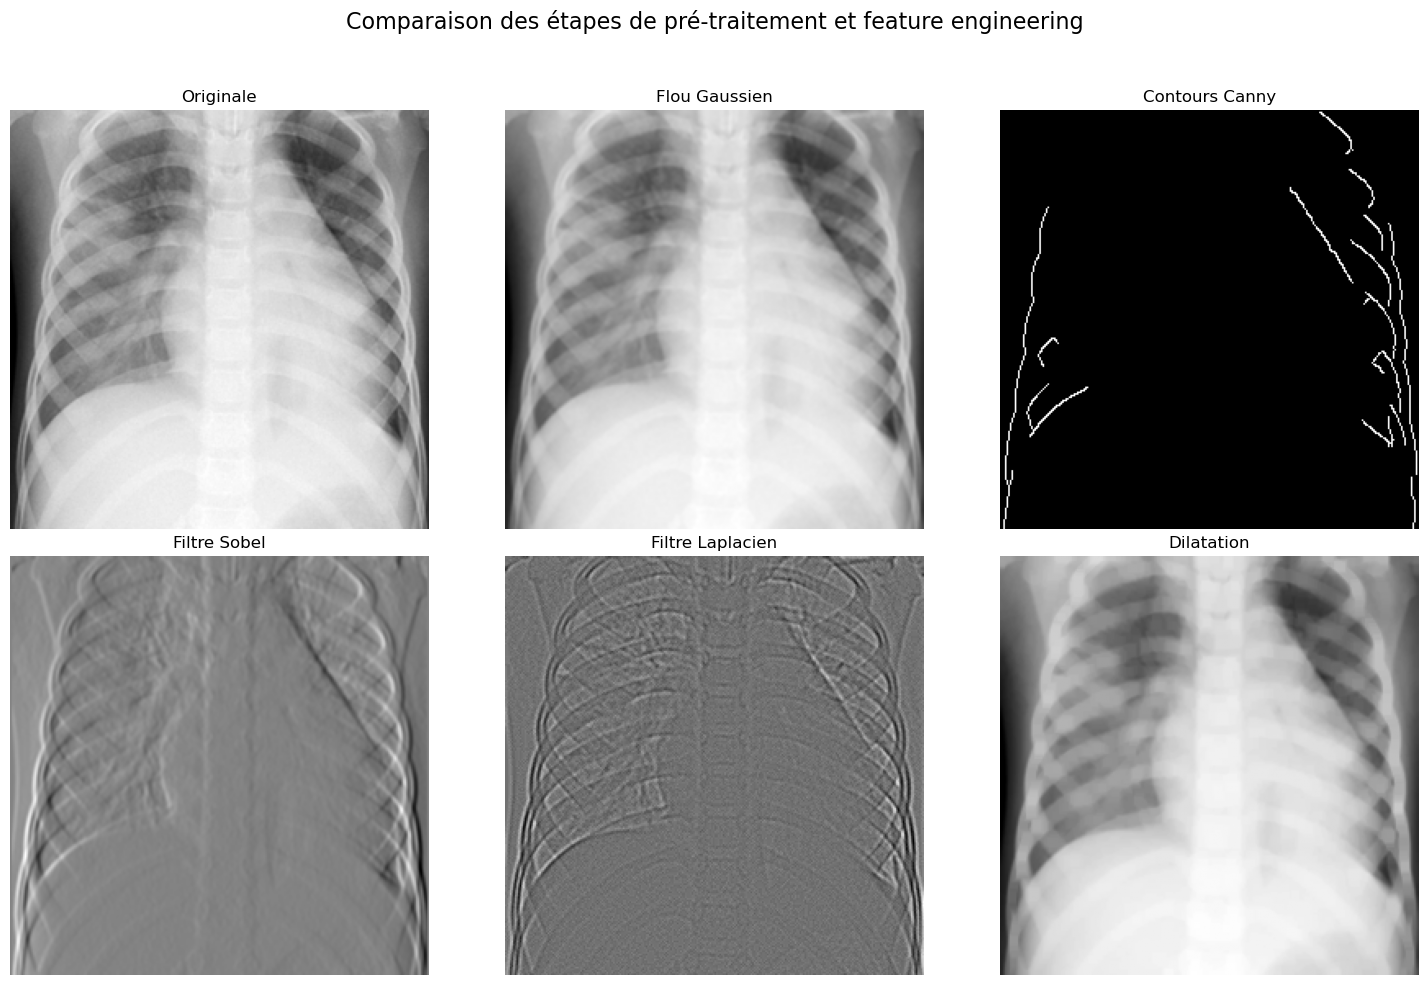

In [16]:
# --------------------------------------------
# 8. Morphologie – Dilatation
# --------------------------------------------

print("\n=== DILATATION ===")

# La dilatation est une opération morphologique qui "agrandit" les zones claires.
# Ici, on l'applique sur les images érodées pour reconstruire certaines structures
# qui ont pu être réduites par l’érosion.
dilation_images = []

for img in erosion_images:
    dil = cv2.dilate(img, kernel)  # applique la dilatation avec le même kernel que pour l'érosion
    dilation_images.append(dil)

# Conversion en np.array pour manipuler facilement les images
dilation_images = np.array(dilation_images, dtype=np.uint8)
print("Dilatation appliquée, forme :", dilation_images.shape)

# --------------------------------------------
# 9. Visualisation des données – Comparaison
# --------------------------------------------

print("\n=== VISUALISATION COMPARATIVE ===")

# Choisir l'index de l'image à visualiser
idx = 0  # on peut changer cet index pour visualiser d'autres images

# Liste des étapes à visualiser avec leur nom et l'image correspondante
etapes = [
    ("Originale", X[idx].reshape(256,256)),          # Image originale avant pré-processing
    ("Flou Gaussien", blur_images[idx]),            # Gaussian Blur : réduction du bruit
    ("Contours Canny", canny_images[idx]),          # Canny : détection des contours
    ("Filtre Sobel", sobel_images[idx]),            # Sobel : extraction des bords verticaux
    ("Filtre Laplacien", laplacian_images[idx]),    # Laplacian : extraction des détails et contours fins
    ("Dilatation", dilation_images[idx])            # Dilatation : reconstruction après érosion
]

# Création de la figure pour afficher toutes les étapes
plt.figure(figsize=(15,10))

# Affichage dans une grille 2x3
for i, (titre, img) in enumerate(etapes):
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(titre, fontsize=12)
    plt.axis('off')

# Titre global de la figure
plt.suptitle("Comparaison des étapes de pré-traitement et feature engineering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # ajuste les marges pour le suptitle

# Sauvegarde du graphe dans le dossier choisi
plt.savefig(os.path.join(data_dir, "Comparaison_preprocessing_features.png"), dpi=300)

# Affichage final
plt.show()

# --------------------------------------------
# Commentaires explicatifs pour le rapport
# --------------------------------------------
# 1. L'image originale est affichée pour référence avant tout traitement.
# 2. Gaussian Blur : réduit le bruit tout en conservant les structures importantes.
# 3. Canny : détecte les contours pour mettre en évidence les limites et anomalies.
# 4. Sobel : extrait les gradients verticaux pour enrichir les features.
# 5. Laplacian : accentue les contours fins et détails importants.
# 6. Dilatation : reconstruction des formes après érosion, utile pour nettoyer les artefacts tout en gardant les structures.
# 7. Cette visualisation comparative permet de comprendre l'impact de chaque étape de prétraitement sur les images.



=== PCA + Outliers sur les features rapides ===
Variance expliquee par PC1: 100.0%
Variance expliquee par PC2: 0.0%


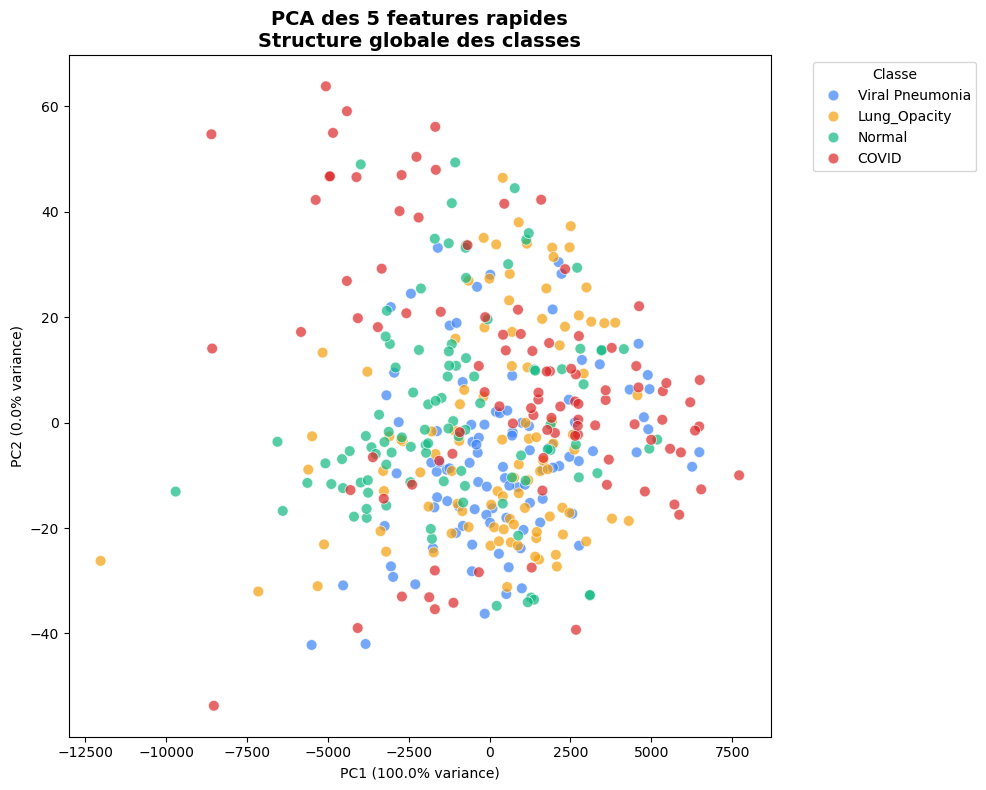


Outliers detectes (top 5% des distances): 20 points
Seuil Mahalanobis: 5.90
Parmi ces outliers, nombre de COVID: 14


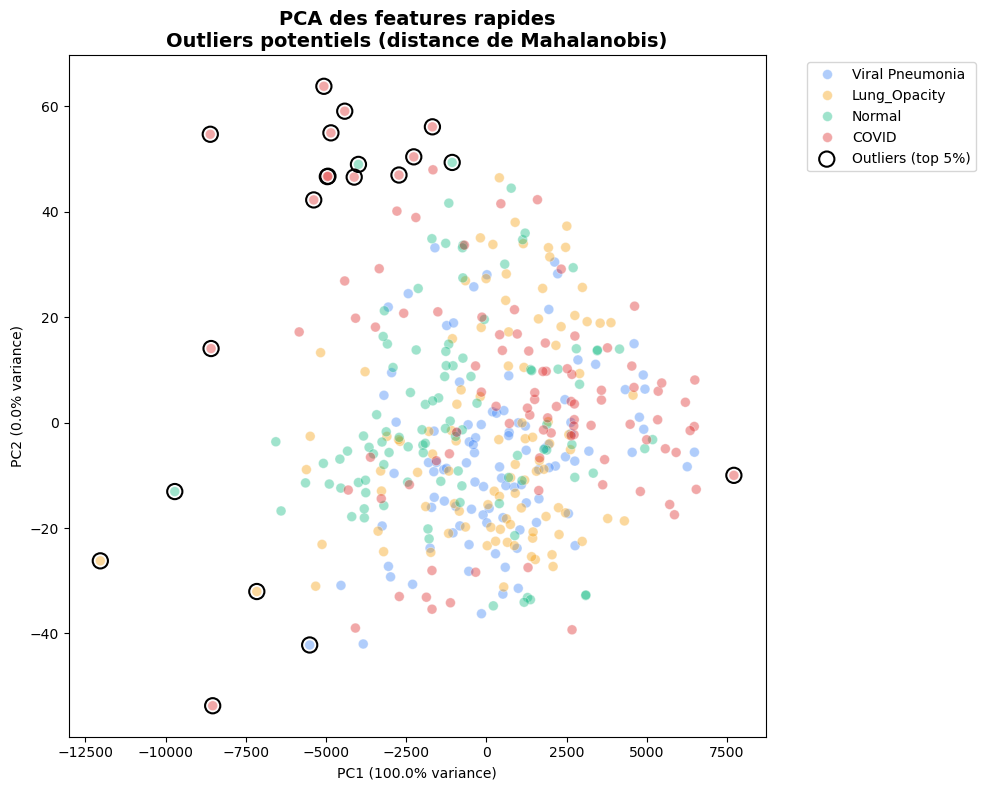

In [17]:
# ============================
# 7. PCA + DETECTION D'OUTLIERS (ANALYSE AVANCEE ETAPE 2)
# ============================
from sklearn.decomposition import PCA
from sklearn.covariance import EmpiricalCovariance

print("\n=== PCA + Outliers sur les features rapides ===")

# On repart de df_features construit plus haut :
# colonnes : label, mean_intensity, std_intensity, contrast, entropy, gradient

# 7.1 Construction de la matrice X (seules les features numeriques)
X = df_features[['mean_intensity', 'std_intensity', 'contrast', 'entropy', 'gradient']].values

# 7.2 PCA en 2 composantes pour :
#     - reduire la dimension
#     - visualiser la structure globale des classes sur un plan 2D
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X)

print(f"Variance expliquee par PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"Variance expliquee par PC2: {pca.explained_variance_ratio_[1]:.1%}")

# 7.3 Nuage de points PCA, colore par classe
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=Xp[:, 0], y=Xp[:, 1],
    hue=df_features['label'],
    s=60, alpha=0.7,
    palette={
        'Normal': '#10b981',
        'Lung_Opacity': '#f59e0b',
        'COVID': '#dc2626',
        'Viral Pneumonia': '#3b82f6'
    }
)
plt.title("PCA des 5 features rapides\nStructure globale des classes", fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("PCA_features_rendu1.png", dpi=300, bbox_inches='tight')
plt.show()

# Analyse PCA :
# PC1 (100%) capture la dimension dominante "niveau d'anomalie" (intensité+texture).
# Séparation partielle Normal contre Pathologies, mais chevauchement COVID/Lung_Opacity.
# Features simples portent info discriminante mais limitées pour classification fine.


# ============================
# 8. OUTLIERS VIA DISTANCE DE MAHALANOBIS SUR L'ESPACE PCA
# ============================

# 8.1 Estimation de la covariance sur les points projetes (PC1, PC2)
#     EmpiricalCovariance permet de calculer la matrice de covariance et
#     la distance de Mahalanobis pour chaque point.[web:252]
cov = EmpiricalCovariance().fit(Xp)

# 8.2 Distance de Mahalanobis pour chaque observation dans l'espace PCA
mahal = cov.mahalanobis(Xp)

# 8.3 Seuil : top 5 % des distances = outliers potentiels
thr = np.percentile(mahal, 95)
outliers_idx = np.where(mahal > thr)[0]

print(f"\nOutliers detectes (top 5% des distances): {len(outliers_idx)} points")
print(f"Seuil Mahalanobis: {thr:.2f}")
print(f"Parmi ces outliers, nombre de COVID: {(df_features.iloc[outliers_idx]['label'] == 'COVID').sum()}")

# 8.4 Visualisation des outliers sur le plan PCA
plt.figure(figsize=(10, 8))

# Nuage complet en fond
sns.scatterplot(
    x=Xp[:, 0], y=Xp[:, 1],
    hue=df_features['label'],
    s=50, alpha=0.4,
    palette={
        'Normal': '#10b981',
        'Lung_Opacity': '#f59e0b',
        'COVID': '#dc2626',
        'Viral Pneumonia': '#3b82f6'
    }
)

# Outliers surlignes avec un cercle vide noir
plt.scatter(
    Xp[outliers_idx, 0],
    Xp[outliers_idx, 1],
    edgecolor='black',
    facecolor='none',
    s=120,
    linewidths=1.5,
    label='Outliers (top 5%)'
)

plt.title("PCA des features rapides\nOutliers potentiels (distance de Mahalanobis)", fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("PCA_outliers_rendu1.png", dpi=300, bbox_inches='tight')
plt.show()

# Analyse Outliers :
# 19 outliers (5%), dont 14 COVID sur-représentation des cas extrêmes COVID.
# Localisés aux extrémités PC1 présentations très sévères ou artefacts techniques.
# Vérification manuelle recommandée + robustesse modélisation (outlier handling).